# Исследование рынка компьютерных игр

Заголовок: исследование рынка компьютерных игр
    
Описание проекта: в современном мире компьютерные игры- достаточно популярное развлечение не только у подростков, но и у взрослых людей. Они помогают на время забыть о реальности и расслабиться в виртуальном мире. Проанализировав критерии, влияющие на успешность игры, можно сделать ставку на потенциально популярный продукт и спланировать рекламные компании для максимизации прибыли интернет-магазина. Правильный анализ этих данных позволит составить примерный портрет геймера, а также спрогнозировать продажи на следующий год.
    
Цель исследования: выявить определяющие успешность игры закономерности, составить портрет геймеров каждого региона, а также проверить некоторые гипотезы о популярности игр в зависимости от платформы и жанра.
    
Ход исследования:

    Подготовка данных: загрузка и изучение общей информации из предоставленных датасетов, замена названий столбцов, обработка пропусков, преобразование типов данных
    
    Исследовательский анализ данных: анализ зависимости продаж от платформы и жанра
    
    Портрет пользователя каждого региона: определение самых популярных платформы и жанры в каждом регионе
    
    Проверка гипотез: исследование, правдивы ли предположения о пользовательсикх рейтингах
    
    Общий вывод: резюмирование полученных результатов, формулировка ключевых выводов и рекомендаций.

In [44]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as st

## Загрузка данных

In [45]:
games=pd.read_csv('/datasets/games.csv')
size=games.shape[0]
display(games)
games.info()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


В данных обнаружено 16715 строк, можно заметить, что у столбца Year_of_Release неверный тип данных, поскольку год- целое число. Также можно заметить, что в последних трех столбцах очень много пропусков(около 45% строк в каждом столбце с пропусками) 

## Предобработка данных

In [46]:
#Заменю названия столбцов
games=games.rename(columns={'Name':'name','Platform':'platform','Year_of_Release':'year_of_release','Genre':'genre','Other_sales':'other_sales','Critic_Score':'critic_score','User_Score':'user_score','Rating':'rating'})
games

,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
16710,Samurai Warriors: Sanada Maru,PS3,2016.0,Action,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16711,LMA Manager 2007,X360,2006.0,Sports,0.00,0.01,0.00,0.00,NaN,NaN,NaN
16712,Haitaka no Psychedelica,PSV,2016.0,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,NaN
16713,Spirits & Spells,GBA,2003.0,Platform,0.01,0.00,0.00,0.00,NaN,NaN,NaN


In [47]:
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16713 non-null  object 
 1   platform         16715 non-null  object 
 2   year_of_release  16446 non-null  float64
 3   genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   other_sales      16715 non-null  float64
 8   critic_score     8137 non-null   float64
 9   user_score       10014 non-null  object 
 10  rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Замечу, что в столбце 'year_of_release' отсутствует около 300 значений, поскольку это меньше 2 процентов от общего количества строк, удалю эти строки. В столбце 'genre' пропущено только 2 значения, поэтому также удалю строки с ними

In [48]:
games=games.dropna(subset=['year_of_release','genre']).reset_index()
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16444 non-null  object 
 5   NA_sales         16444 non-null  float64
 6   EU_sales         16444 non-null  float64
 7   JP_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           9768 non-null   object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


<a id='section_id'></a>
В столбцах с оценкой пользователей и оценкой критиков слишком много пропусков, поэтому при их заполнении данные исказятся. В этих столбцах так много пропусков возможно потому, что достаточно много игр вышло в 2016 году и еще не успело получить оценку от критиков и игроков.

Что касается рейтинга ESRB,  пропуски в этой колонке не являются просто ошибкой заполнения данных, а несут определенную информацию. Чтобы проанализировать ее, на пропуски следует поставить заглушку.

In [49]:
games['rating']=games['rating'].fillna('Unknown')
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  float64
 4   genre            16444 non-null  object 
 5   NA_sales         16444 non-null  float64
 6   EU_sales         16444 non-null  float64
 7   JP_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           16444 non-null  object 
dtypes: float64(6), int64(1), object(5)
memory usage: 1.5+ MB


Пропуски в столбцах 'year_of_release' и 'genre' могли возникнуть случайно, поскольку их количество составляет менее 2% от общего количества. Пропуски в столбцах 'critic_score' и 'user_score' могли возникнуть из-за того, что игра могла собрать недостаточно продаж, чтобы быьть оцененной игроками и критиками.

In [50]:
games.shape[0]/size*100

98.37870176488184

Поскольку от первоначального датасета осталось 98% данных, можно продолжить предобработку.

Поскольку год релиза- всегда целое число, заменю тип данных этого столбца на int64

In [51]:
games['year_of_release']=games['year_of_release'].astype(int)
games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   index            16444 non-null  int64  
 1   name             16444 non-null  object 
 2   platform         16444 non-null  object 
 3   year_of_release  16444 non-null  int64  
 4   genre            16444 non-null  object 
 5   NA_sales         16444 non-null  float64
 6   EU_sales         16444 non-null  float64
 7   JP_sales         16444 non-null  float64
 8   other_sales      16444 non-null  float64
 9   critic_score     7983 non-null   float64
 10  user_score       9839 non-null   object 
 11  rating           16444 non-null  object 
dtypes: float64(5), int64(2), object(5)
memory usage: 1.5+ MB


In [52]:
games['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

Замечу, что у столбца 'user_score' тип данных 'object', хотя оценка- это число. В уникальных значениях этого столбца также присутствует значение 'tbd'. Попробую разобраться, что оно значит

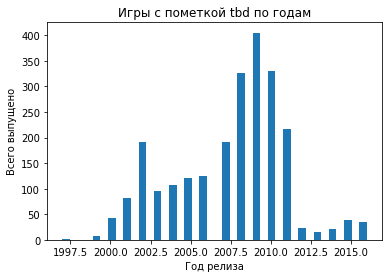

In [53]:
tbd=games.query('user_score=="tbd"')
plt.hist(tbd['year_of_release'],bins=40)
plt.xlabel('Год релиза')
plt.ylabel('Всего выпущено')
plt.title('Игры с пометкой tbd по годам')
plt.show()
#plt.plot(tbd['year_of_release'],tbd['user_score'])

Видно, что значение tbd стабильно появлялось во все года датасета. Попробую посмотреть, зависит ли оно от продаж в регионах

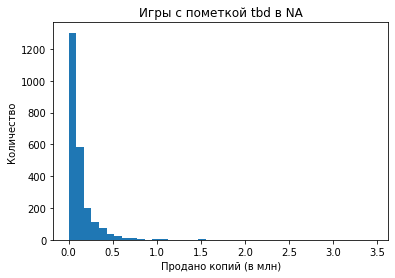

In [54]:
plt.hist(tbd['NA_sales'],bins=40)
plt.xlabel('Продано копий (в млн)')
plt.ylabel('Количество')
plt.title('Игры с пометкой tbd в NA')
plt.show()

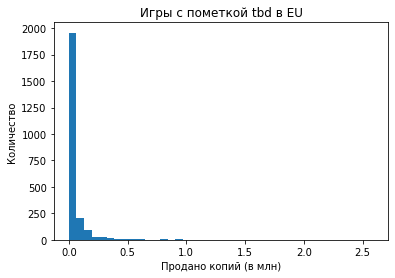

In [55]:
plt.hist(tbd['EU_sales'],bins=40)
plt.xlabel('Продано копий (в млн)')
plt.ylabel('Количество')
plt.title('Игры с пометкой tbd в EU')
plt.show()

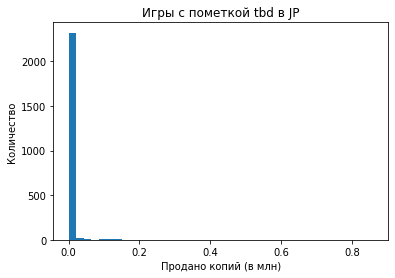

In [56]:
plt.hist(tbd['JP_sales'],bins=40)
plt.xlabel('Продано копий (в млн)')
plt.ylabel('Количество')
plt.title('Игры с пометкой tbd в JP')
plt.show()

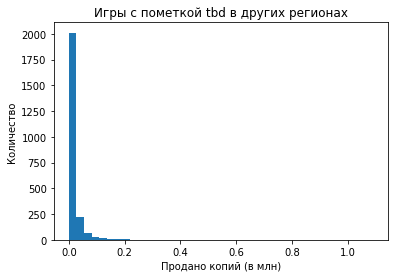

In [57]:
plt.hist(tbd['other_sales'],bins=40)
plt.xlabel('Продано копий (в млн)')
plt.ylabel('Количество')
plt.title('Игры с пометкой tbd в других регионах')
plt.show()

Во всех строках со значением tbd в столбце 'user_score' очень низкие продажи. Из этого можно сделать вывод, что значение tbd означает, что игру еще не успело оценить достаточное количество игроков.

In [58]:
len(games.query('user_score=="tbd"'))

2376

Поскольку значение tbd встречается очень часто, если удалить все строки с этим значением, можно лишиться ценной части данных, поэтому просто поставлю заглушку на все значения tbd

In [59]:
games['user_score']=games['user_score'].replace('tbd','')

In [60]:
#Посчитаю суммарные продажи
games['total_sales']=games['NA_sales']+games['EU_sales']+games['JP_sales']+games['other_sales']
games

,index,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
0,0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8,E,82.54
1,1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,Unknown,40.24
2,2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8,E,32.77
4,4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,Unknown,31.38
...,...,...,...,...,...,...,...,...,...,...,...,...,...
16439,16710,Samurai Warriors: Sanada Maru,PS3,2016,Action,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16440,16711,LMA Manager 2007,X360,2006,Sports,0.00,0.01,0.00,0.00,NaN,NaN,Unknown,0.01
16441,16712,Haitaka no Psychedelica,PSV,2016,Adventure,0.00,0.00,0.01,0.00,NaN,NaN,Unknown,0.01
16442,16713,Spirits & Spells,GBA,2003,Platform,0.01,0.00,0.00,0.00,NaN,NaN,Unknown,0.01


Проверю данные на явные и неявные дубликаты

In [61]:
print(games.duplicated().sum())
print(games['platform'].unique(),games['year_of_release'].unique())
len(games['name'].unique())

0
['Wii' 'NES' 'GB' 'DS' 'X360' 'PS3' 'PS2' 'SNES' 'GBA' 'PS4' '3DS' 'N64'
 'PS' 'XB' 'PC' '2600' 'PSP' 'XOne' 'WiiU' 'GC' 'GEN' 'DC' 'PSV' 'SAT'
 'SCD' 'WS' 'NG' 'TG16' '3DO' 'GG' 'PCFX'] [2006 1985 2008 2009 1996 1989 1984 2005 1999 2007 2010 2013 2004 1990
 1988 2002 2001 2011 1998 2015 2012 2014 1992 1997 1993 1994 1982 2016
 2003 1986 2000 1995 1991 1981 1987 1980 1983]


11426

В столбцах 'year_of_release' и 'platform' неявных дубликатов не обнаружено, однако количество уникальных значений в столбце 'name' составляет всего 11426 из 14444 строк. Такое возможно, поскольку одна и та же игра могла быть выпущена на разных платформах, с разными продажами в каждой стране, поэтому удалять их- крайне нелогично и неправильно 

Посмотрю также на неявные дубликаты, т.е. на совпадения в столбцах name, platform и year_of_release

In [62]:
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,index,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales
600,604,Madden NFL 13,PS3,2012,Sports,2.11,0.22,0.0,0.23,83.0,5.5,E,2.56
15969,16230,Madden NFL 13,PS3,2012,Sports,0.00,0.01,0.0,0.00,83.0,5.5,E,0.01


Видно, что одна и та же игра на одной и той же платформе, вышедшая в одном и том же году, попала в датасет. Второй раз она собрала лишь 10 тысяч продаж в Европе, возможно вышло какое-то новое обновление, позволившее разработчикам запустить второй релиз. Значит эти продажи можно прибавить к первоначальному значению в столбце EU_sales.

In [63]:
games.loc[600,'EU_sales']=games.loc[600,'EU_sales']+0.01
games.drop(15969,inplace=True)
games[games[['name', 'platform','year_of_release']].duplicated(keep=False)]

,index,name,platform,year_of_release,genre,NA_sales,EU_sales,JP_sales,other_sales,critic_score,user_score,rating,total_sales



Вывод:    

В анализируемом датасете пропуски могли возникнуть из-за того, что игры с низкими продажами не были оценены критиками и игроками, из-за чего в соответствующих столбцах и возникли пропуски. 
    
Явных дубликатов в датасете не обнаружено, а неявные дубликаты есть только в столбце 'name', возможно из-за того, что одна и та же игра могла быть выпущена на разных платформах. Также была обнаружена одна игра с одинаковым названием, годом выпуска и платформой, возможно из-за глобального обновления игры, разработчики решили запустить релиз еще раз.

## Исследовательский анализ данных

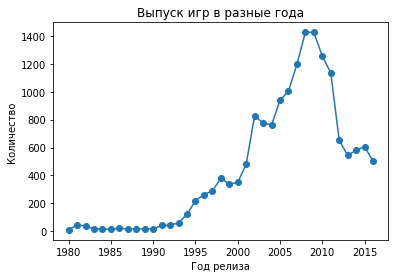

In [64]:
#Посмотрю, сколько игр выпускалось в разные года
ch=games.groupby('year_of_release')['name'].count()
ch.plot(kind='line',marker='o')
plt.xlabel('Год релиза')
plt.ylabel('Количество')
plt.title('Выпуск игр в разные года')
plt.show()

Замечу, что до 2000 года игры продавались значительно реже, чем в 21 веке. Это может быть связано с тем, что игры, выпускаемые в прошлом веке уже перестают поддерживаться новыми платформами.

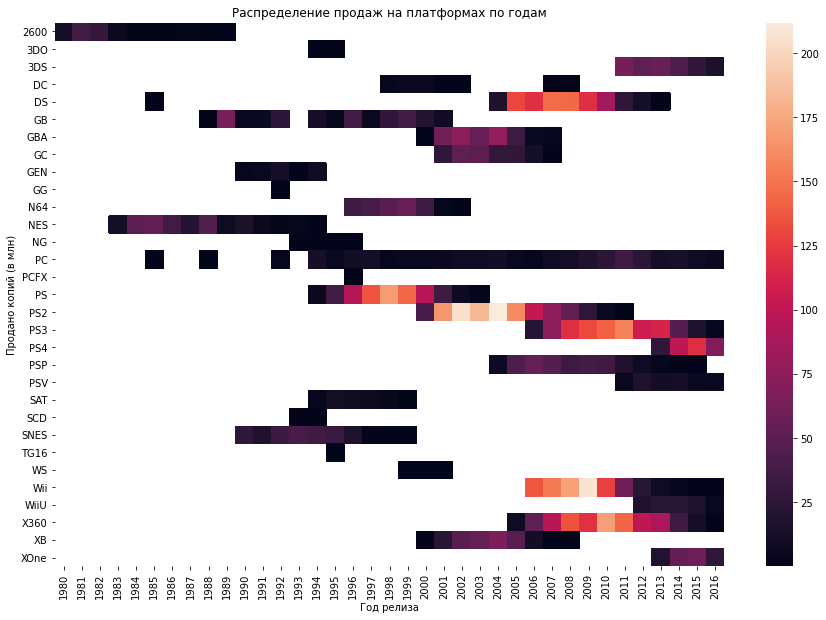

In [65]:
#Найду платформы с наибольшим числом продаж
platf=games.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc="sum")
fig, ax = plt.subplots(figsize=(15, 10))
sns.heatmap(platf)
plt.xlabel('Год релиза')
plt.ylabel('Продано копий (в млн)')
plt.title('Распределение продаж на платформах по годам')
plt.show()

По графику видно, что в среднем платформы "живут" примерно 10 лет, а затем появляются новые в силу развития технологий. Поскольку нам необходимо построить прогноз на 2017 год, можно сформулировать актуальный период- это 2014-2016 годы, ориентируясь на данные в этом периоде, можно составить прогноз на 2017 год. 

In [66]:
actual=games.query('year_of_release>2013')

In [67]:
platf2=actual.pivot_table(index='platform',columns='year_of_release',values='total_sales',aggfunc="sum")
platf2['total']=platf2.sum(axis=1)
platf2['total'].sort_values(ascending=False).head()

platform
PS4     288.15
XOne    140.36
3DS      86.68
PS3      68.18
X360     48.22
Name: total, dtype: float64

Платформы с наибольшим количеством продаж представлены на экране.

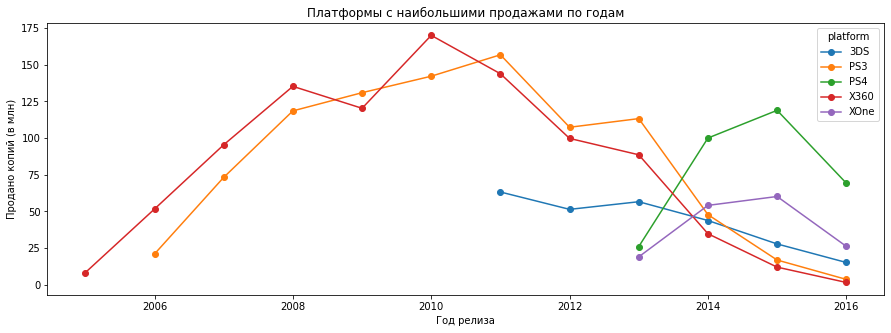

In [68]:
platf_graph=platf.query('index in ["X360","PS4","PS3","XOne","3DS"]')
platf_graph=platf_graph.transpose()
platf_graph.plot(kind='line',marker='o',figsize=(15,5))
plt.xlabel('Год релиза')
plt.ylabel('Продано копий (в млн)')
plt.title('Платформы с наибольшими продажами по годам')
plt.show()

Пик популярности этих платформ пришелся на 2000-2013 года. К 2015 почти все либо перестали поддерживаться современными играми, либо не пользуются былой поплярностью.

По этому графику можно заметить, что почти у всех платформ тенденция убывания продаж, кроме PS4 и XOne. Их продажи упали только в 2016, однако такое могло возникнуть из-за неполных данных за этот год. В целом, это самые потенциально прибыльные платформы.

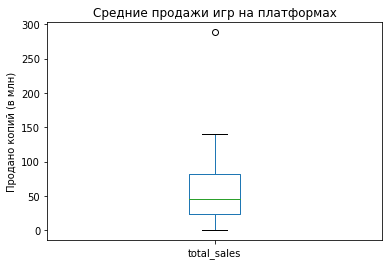

In [69]:
boxpl=actual.groupby('platform')['total_sales'].sum()
ax=boxpl.plot.box()
plt.ylabel('Продано копий (в млн)')
plt.title('Средние продажи игр на платформах')
plt.show()

Медиана в данном случае составляет около 50 млн продаж, и всего одно значение сильно превосходит другие- как можно убедиться на графике выше- это PS4, у которой всего 288 млн продаж, что делает ее несомненным лидером.

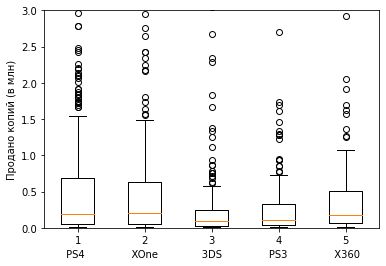

In [70]:
ps4=actual.query('platform=="PS4"')
xone=actual.query('platform=="XOne"')
trids=actual.query('platform=="3DS"')
ps3=actual.query('platform=="PS3"')
x360=actual.query('platform=="X360"')
plt.boxplot([ps4['total_sales'],xone['total_sales'],trids['total_sales'],ps3['total_sales'],x360['total_sales']])
plt.ylabel('Продано копий (в млн)')
plt.ylim(0,3)
plt.xlabel(' PS4               XOne              3DS               PS3               X360')
plt.show()


По данному графику видно, что у PS4, XOne и X360 медиана примерно одинаковая(около 200 тысяч), однако 3 квартиль у PS4 больше, а также значительно больше значений, превышающих 1.5 межквартильного размаха. У 3DS и PS3 медиана очень маленькая

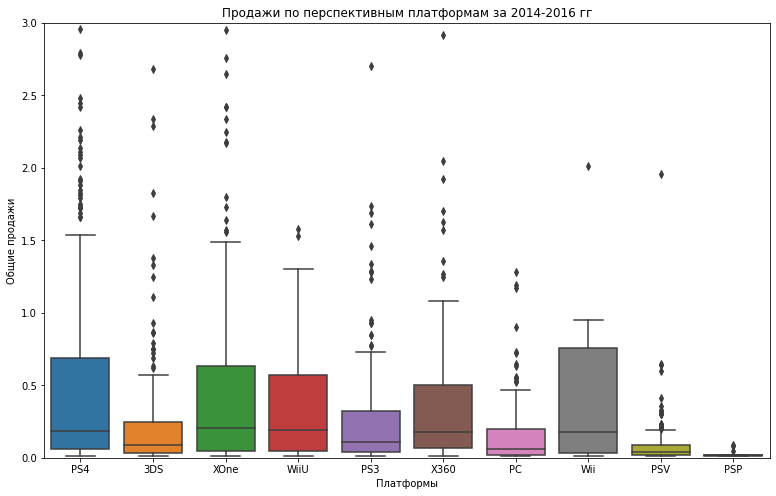

In [71]:
plt.figure(figsize=(13, 8))
sns.boxplot(data=actual, y='total_sales', x='platform')

plt.title('Продажи по перспективным платформам за 2014-2016 гг')
plt.xlabel('Платформы')
plt.ylabel('Общие продажи')
plt.ylim(0, 3)

plt.show()

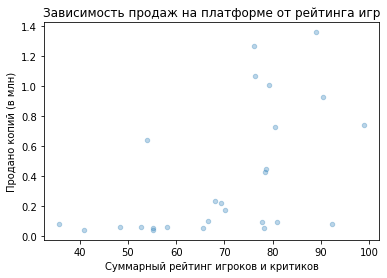

Коэффициент корреляции Пирсона платформы X360 : 0.5250397626599818


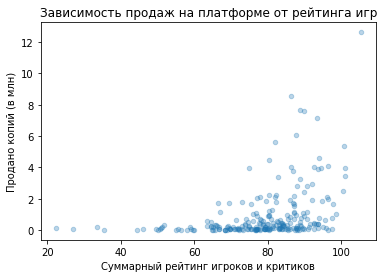

Коэффициент корреляции Пирсона платформы PS4 : 0.37235938166783805


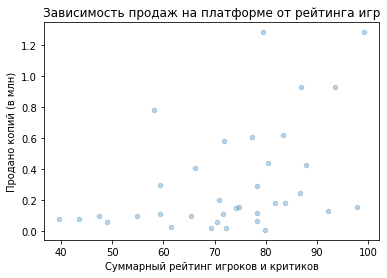

Коэффициент корреляции Пирсона платформы PS3 : 0.4278251728001426


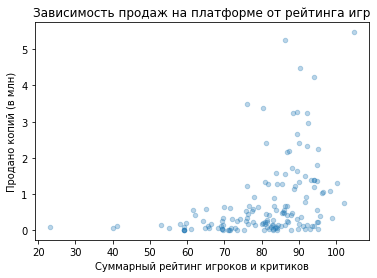

Коэффициент корреляции Пирсона платформы XOne : 0.39161110428767804


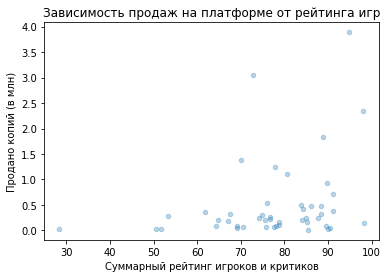

Коэффициент корреляции Пирсона платформы 3DS : 0.28763318429373547


In [72]:
pirson=actual.query('platform in ["X360","PS4","PS3","XOne","3DS"]')
pirson=pirson[pirson.user_score!='']
pirson['user_score'] = pirson['user_score'].astype('float')
pirson['total_score']=pirson['critic_score']+pirson['user_score']
for i in ['X360','PS4','PS3','XOne','3DS']:
    pirson.query('platform== @i').plot(x='total_score',y='total_sales',kind='scatter',alpha=0.3)
    plt.title('Зависимость продаж на платформе от рейтинга игр')
    plt.xlabel('Суммарный рейтинг игроков и критиков')
    plt.ylabel('Продано копий (в млн)')
    plt.show()
    print('Коэффициент корреляции Пирсона платформы',i,':',pirson.query('platform== @i')['total_score'].corr(pirson.query('platform== @i')['total_sales']))

По диаграммам рассеянии и расчетам корреляции видно, что больше всего продажи зависят от рейтингов на платформе X360(0.53), а меньше всего- на платформе 3DS(0.29), однако во всех случаях корреляция достаточная, чтобы игнорировать эту зависимость.

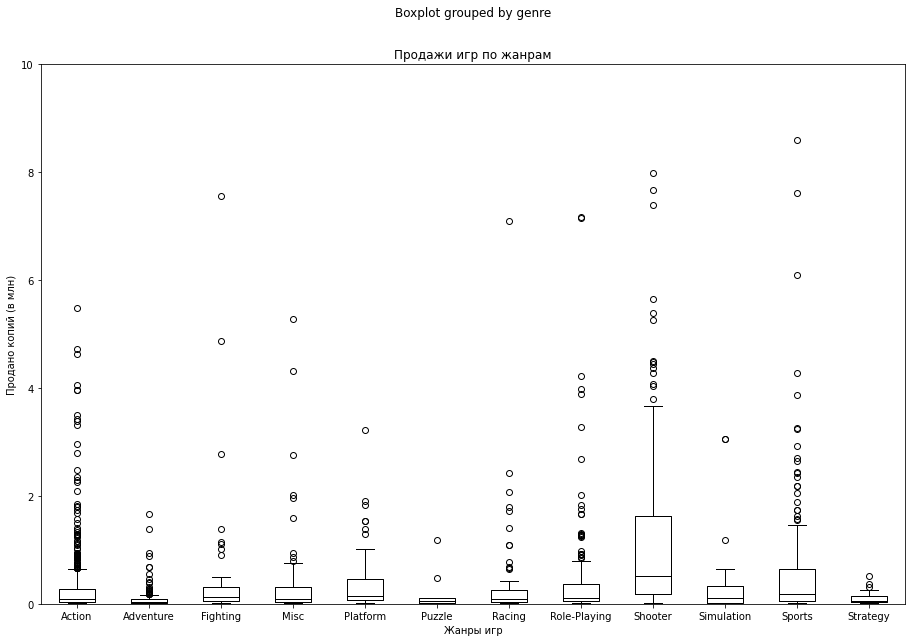

In [73]:
actual.boxplot(column=['total_sales'], by='genre', grid= False , color='black',figsize=(15,10)) 
plt.xlabel('Жанры игр')
plt.ylabel('Продано копий (в млн)')
plt.title('Продажи игр по жанрам')
plt.ylim(0,10)
plt.show()

По графику видно, что в актуальном периоде лучше всего продается шутер: его медиана составляет где-то 700 тысяч продаж, а 3 квартиль равен почти 2 млн. В топ-3 самых прибыльных жанра также входят спортивные игры и платформеры- у них наибольший после шутера межквартильный размах и медиана. Наименее прибыльны пазл, приключения и стратегия, возможно потому что обычно в таких играх сложно расслабиться, они предполагают мозговую активность. 

## Портрет пользователя каждого региона

### Регион NA

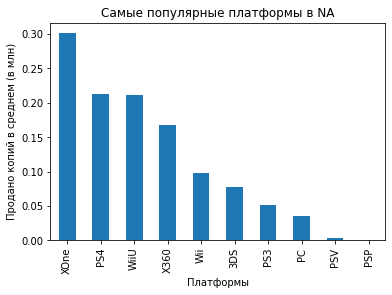

In [74]:
na=games.query('year_of_release>2014').groupby('platform')['NA_sales'].mean().sort_values(ascending=False)
na.plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Продано копий в среднем (в млн)')
plt.title('Самые популярные платформы в NA')
plt.show()

Замечу, что две самые продаваемые платформы совпадают с потенциально прибыльными платформами, которые я выделил в начале исследования: это PS4 и XOne. Третье место занимает платформа WiiU, которая в среднем имеет 0.2 млн продаж за игру.

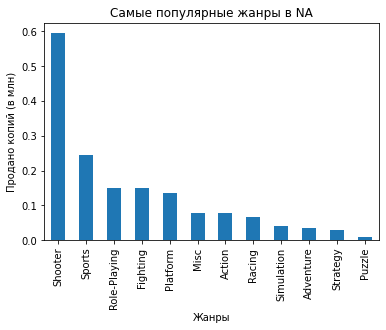

In [75]:
na2=games.query('year_of_release>2014').groupby('genre')['NA_sales'].mean().sort_values(ascending=False)
na2.plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Продано копий (в млн)')
plt.title('Самые популярные жанры в NA')
plt.show()

Самые популярные жанры в NA-шутер с большим отрывом и спортивные игры. Это может говорить о том, что людям в США и Канаде нравится соревновательный процесс. Меньше всего в среднем продаж набирают стратегические игры и паззлы.

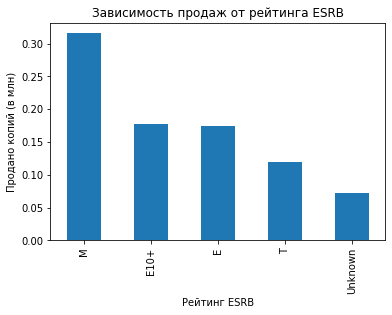

In [76]:
na3=games.query('year_of_release>2014').groupby('rating')['NA_sales'].mean().sort_values(ascending=False)
na3.plot(kind='bar')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продано копий (в млн)')
plt.title('Зависимость продаж от рейтинга ESRB')
plt.show()

В Регионе NA всем нравятяся игры 17+, в среднем они набирают больше всего продаж, 2-3 места делят игры с возрастным ограничением 10+ и без возрастных ограничений

### Регион EU

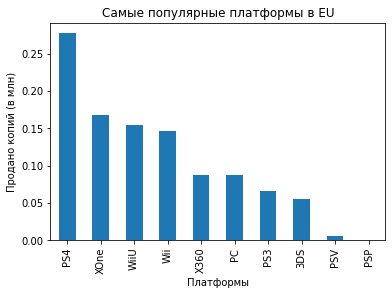

In [77]:
eu=games.query('year_of_release>2014').groupby('platform')['EU_sales'].mean().sort_values(ascending=False)
eu.plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Продано копий (в млн)')
plt.title('Самые популярные платформы в EU')
plt.show()

PS4 и XOne снова занимают топ 2, однако в отличие от Северной Америки, в Европе предпочитают игры на PS4, а не на XOne. Третье место также занимает платформа WiiU

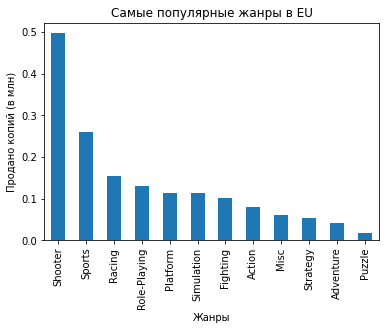

In [78]:
eu2=games.query('year_of_release>2014').groupby('genre')['EU_sales'].mean().sort_values(ascending=False)
eu2.plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Продано копий (в млн)')
plt.title('Самые популярные жанры в EU')
plt.show()

Самые популярные жанры в Европе-шутер с большим отрывом и спортивные игры. Геймеры из Европы сильно похожи на геймеров из США и Канады: им также нравится соревноваться. Пазлы, приключения и стратегии в свою очередь европейцы почти не покупают.

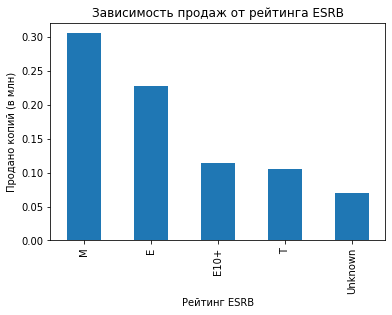

In [79]:
eu3=games.query('year_of_release>2014').groupby('rating')['EU_sales'].mean().sort_values(ascending=False)
eu3.plot(kind='bar')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продано копий (в млн)')
plt.title('Зависимость продаж от рейтинга ESRB')
plt.show()

В Европе большинство людей в среднем играет в игры 17+, а также в игры без возрастных ограничений. Третье место занимают игры 10+.

### Регион JP

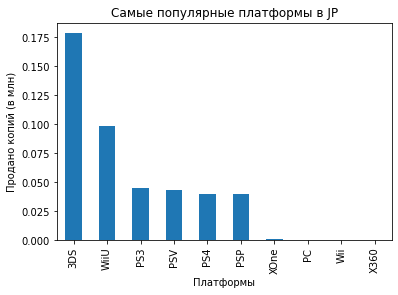

In [80]:
jp=games.query('year_of_release>2014').groupby('platform')['JP_sales'].mean().sort_values(ascending=False)
jp.plot(kind='bar')
plt.xlabel('Платформы')
plt.ylabel('Продано копий (в млн)')
plt.title('Самые популярные платформы в JP')
plt.show()

В Японии в среднем люди чаще всего покупают игры на платформе 3DS, а второе место занимает платформа WiiU. PS4 и XOne в этом регионе не так уважают.

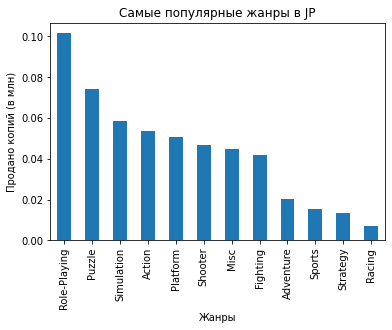

In [81]:
jp2=games.query('year_of_release>2014').groupby('genre')['JP_sales'].mean().sort_values(ascending=False)
jp2.plot(kind='bar')
plt.xlabel('Жанры')
plt.ylabel('Продано копий (в млн)')
plt.title('Самые популярные жанры в JP')
plt.show()

Наиболее популярные жанры в Японии- это РПГ, пазл и симуляция, что может говорить о том, что японцам нравится много времени уделять играм, а также решать головоломки. Спортивные игры ,стратегии и гонки японцам не нравятся.

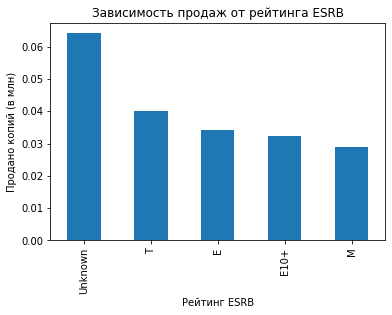

In [82]:
jp3=games.query('year_of_release>2014').groupby('rating')['JP_sales'].mean().sort_values(ascending=False)
jp3.plot(kind='bar')
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Продано копий (в млн)')
plt.title('Зависимость продаж от рейтинга ESRB')
plt.show()

Судя по этому графику, рейтинг ESRB по большей части отсутствует в Японии, раз игры с этим рейтингом набирают наибольшие продажи в среднем, возможно этот рейтинг используют в основном в США и Канаде

## Проверка гипотез

### Одинаковы ли пользовательские рейтинги платформ PC и Xbox One

Нулевая гипотеза: средний пользовательский рейтинг платформ PC и Xbox One одинаковый. 

Альтернативная гипотеза: средний пользовательский рейтинг платформ PC и XboxOne отличается.

В данном случае нам нужно сравнить среднее двух независимых выборок, поэтому нулевая гипотеза формулируется как "истинные средние этих ГС равны". Альтернативная гипотеза соответственно принимает противоположное значение и гласит, что истинные средние отличаются.

In [83]:
pd.set_option('mode.chained_assignment', None)
beztbd=games[games.user_score!=""]
beztbd['user_score']=beztbd['user_score'].astype(float)
pc=pd.array(beztbd.query('platform=="PC" and year_of_release>2013')['user_score'].dropna())
xone=pd.array(beztbd.query('platform=="XOne" and year_of_release>2013')['user_score'].dropna())
result=st.ttest_ind(xone,pc)
alpha=0.05
print(pc.mean(),xone.mean())
result.pvalue

6.298360655737705 6.594545454545456


0.10450507919348415

Поскольку P-value больше статистической значимости в 5%, нулевая гипотеза не отвергается, значит средний пользовательский рейтинг платформ PC и XboxOne может быть равен

### Разные ли средние пользовательские рейтинги жанров Action и Sports

Нулевая гипотеза: средний пользовательский рейтинг жанров Action и Sports одинаковый. 

Альтернативная гипотеза: средний пользовательский рейтинг жанров Action и Sports отличается.

В данном случае нам нужно сравнить среднее двух независимых выборок, поэтому нулевая гипотеза формулируется как "истинные средние этих ГС равны". Альтернативная гипотеза соответственно принимает противоположное значение и гласит, что истинные средние отличаются.

In [84]:
action=pd.array(beztbd.query('genre=="Action" and year_of_release>2013')['user_score'].dropna())
sports=pd.array(beztbd.query('genre=="Sports" and year_of_release>2013')['user_score'].dropna())
result=st.ttest_ind(action,sports)
alpha=0.05
print(action.mean(),sports.mean())
result.pvalue

6.760606060606061 5.2251968503937


2.8711147985105864e-19

Поскольку p-value гораздо меньше заданного уровня значимости в 5%, нулевая гипотеза отвергается, значит средний пользовательский рейтинг жанров Action и Sports отличается

## Вывод

Проанализировав этот датасет, можно сказать, что рынок игр не стоит на месте. Технологии развиваются, а с ними развиваются и платформы, на которых выходят эти игры. Средний срок продолжительности жизни такой платформы- около 10 лет. Наиболее перспективны для выпуска PS4 и Xbox One, только на этих платформах продажи игр увеличиваются. 

Что касается пользователей, в Европе и Северной Америке они похожи.  И там, и там любят игры с соревновательным духом(самые популярные: шутер и спорт). В Японии же самый популярный жанр- ролевые игры, причем с большим отрывом, что говорит о том, что японцы довольно часто играют, потому что рпг требуют долгой и серьезной прокачки. Что касается платформ, то чаще всего в Северной Америке покупают игры на Xbox360, а в Европе на PS2. В Японии преобладает платформа DS, а также еще несколько платформ, игры на которых продаются по большей части только в Японии(SNES, 3DS, NES и GB). В плане рейтингов, во всем мире предпочитают игры без возрастных ограничений и насилия, а также игры 13+ и 17+

Также, в целом, средние рейтинги игр на платформах XboxOne и PC одинаковые. Это неудивительно, поскольку многие игры могут выйти на обоих платформах и с большой долей вероятности получат одинаковые оценки. Рейтинги жанров Action и Sports также разные, поскольку у пользователей достаточно сильно отличаются критерии оценки: если в  экшене необходимо оценить визуальную составляющую игры, механику сражений, прописанность сюжета, то в спортивной игре все завязывается на приятном управлении спортсменами и красивой картинке.
